In [1]:
#load all necessaries files 
import time
init_time = time.time()
import numpy as np
from functions import ClusterMerits, AuxiliarFunctions
from sklearn.cluster import KMeans
from numpy import linalg as LA
from keras.utils import np_utils
from sklearn import preprocessing


path = "/home/micael/MyWorkspace/DATA"
path_tosave = path+'/Plots'

# signal data 
signal = np.load(path+"/"+"lvbb125Matrix.npy")[0:5000,:]
signal_noPtRel = np.delete(signal,[11,23],1)

# signal normalize
signal_scaled = preprocessing.scale(signal)
signal_scaled_noPtRel = preprocessing.scale(signal_noPtRel)


# signal target
trgt_signal = np.ones(signal.shape[0])

# backgrounds data
#ZZ = np.load(path+"/"+"ZZMatrix.npy")[0:5000,:]
TTbar = np.load(path+"/"+"TTbarMatrix.npy")[0:5000,:]
TTbar_noPtRel = np.delete(TTbar,[11,23],1)

# backgrounds target
trgt_TTbar = 0.0*np.ones(TTbar.shape[0])

# backgrounds normalize
TTbar_scaled = preprocessing.scale(TTbar)
TTbar_scaled_noPtRel = preprocessing.scale(TTbar_noPtRel)

# create the data set
bkg = TTbar
#bkg = np.append(ZZ,TTbar,axis=0)
all_data = np.append(signal,bkg,axis=0)
all_data_noPtRel = np.append(signal_noPtRel,TTbar_noPtRel,axis=0)
trgt = np.append(trgt_signal,trgt_TTbar,axis=0)

# and normalize data set
all_data_scaled = preprocessing.scale(all_data)
all_data_scaled_noPtRel = preprocessing.scale(all_data_noPtRel)
sparse_trgt = np_utils.to_categorical(trgt)

current_time = time.time()
print 'Time to load all files: %1.3f seconds'%(current_time-init_time)

Using Theano backend.
WARNING (theano.sandbox.cuda): CUDA is installed, but device gpu is not available  (error: Unable to get the number of gpus available: CUDA driver version is insufficient for CUDA runtime version)


Time to load all files: 2.176 seconds


/home/micael/.virtualenvs/MyAnalysis/local/lib/python2.7/site-packages/keras/utils/np_utils.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y = np.zeros((len(y), nb_classes))
/home/micael/.virtualenvs/MyAnalysis/local/lib/python2.7/site-packages/keras/utils/np_utils.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y[i, y[i]] = 1.


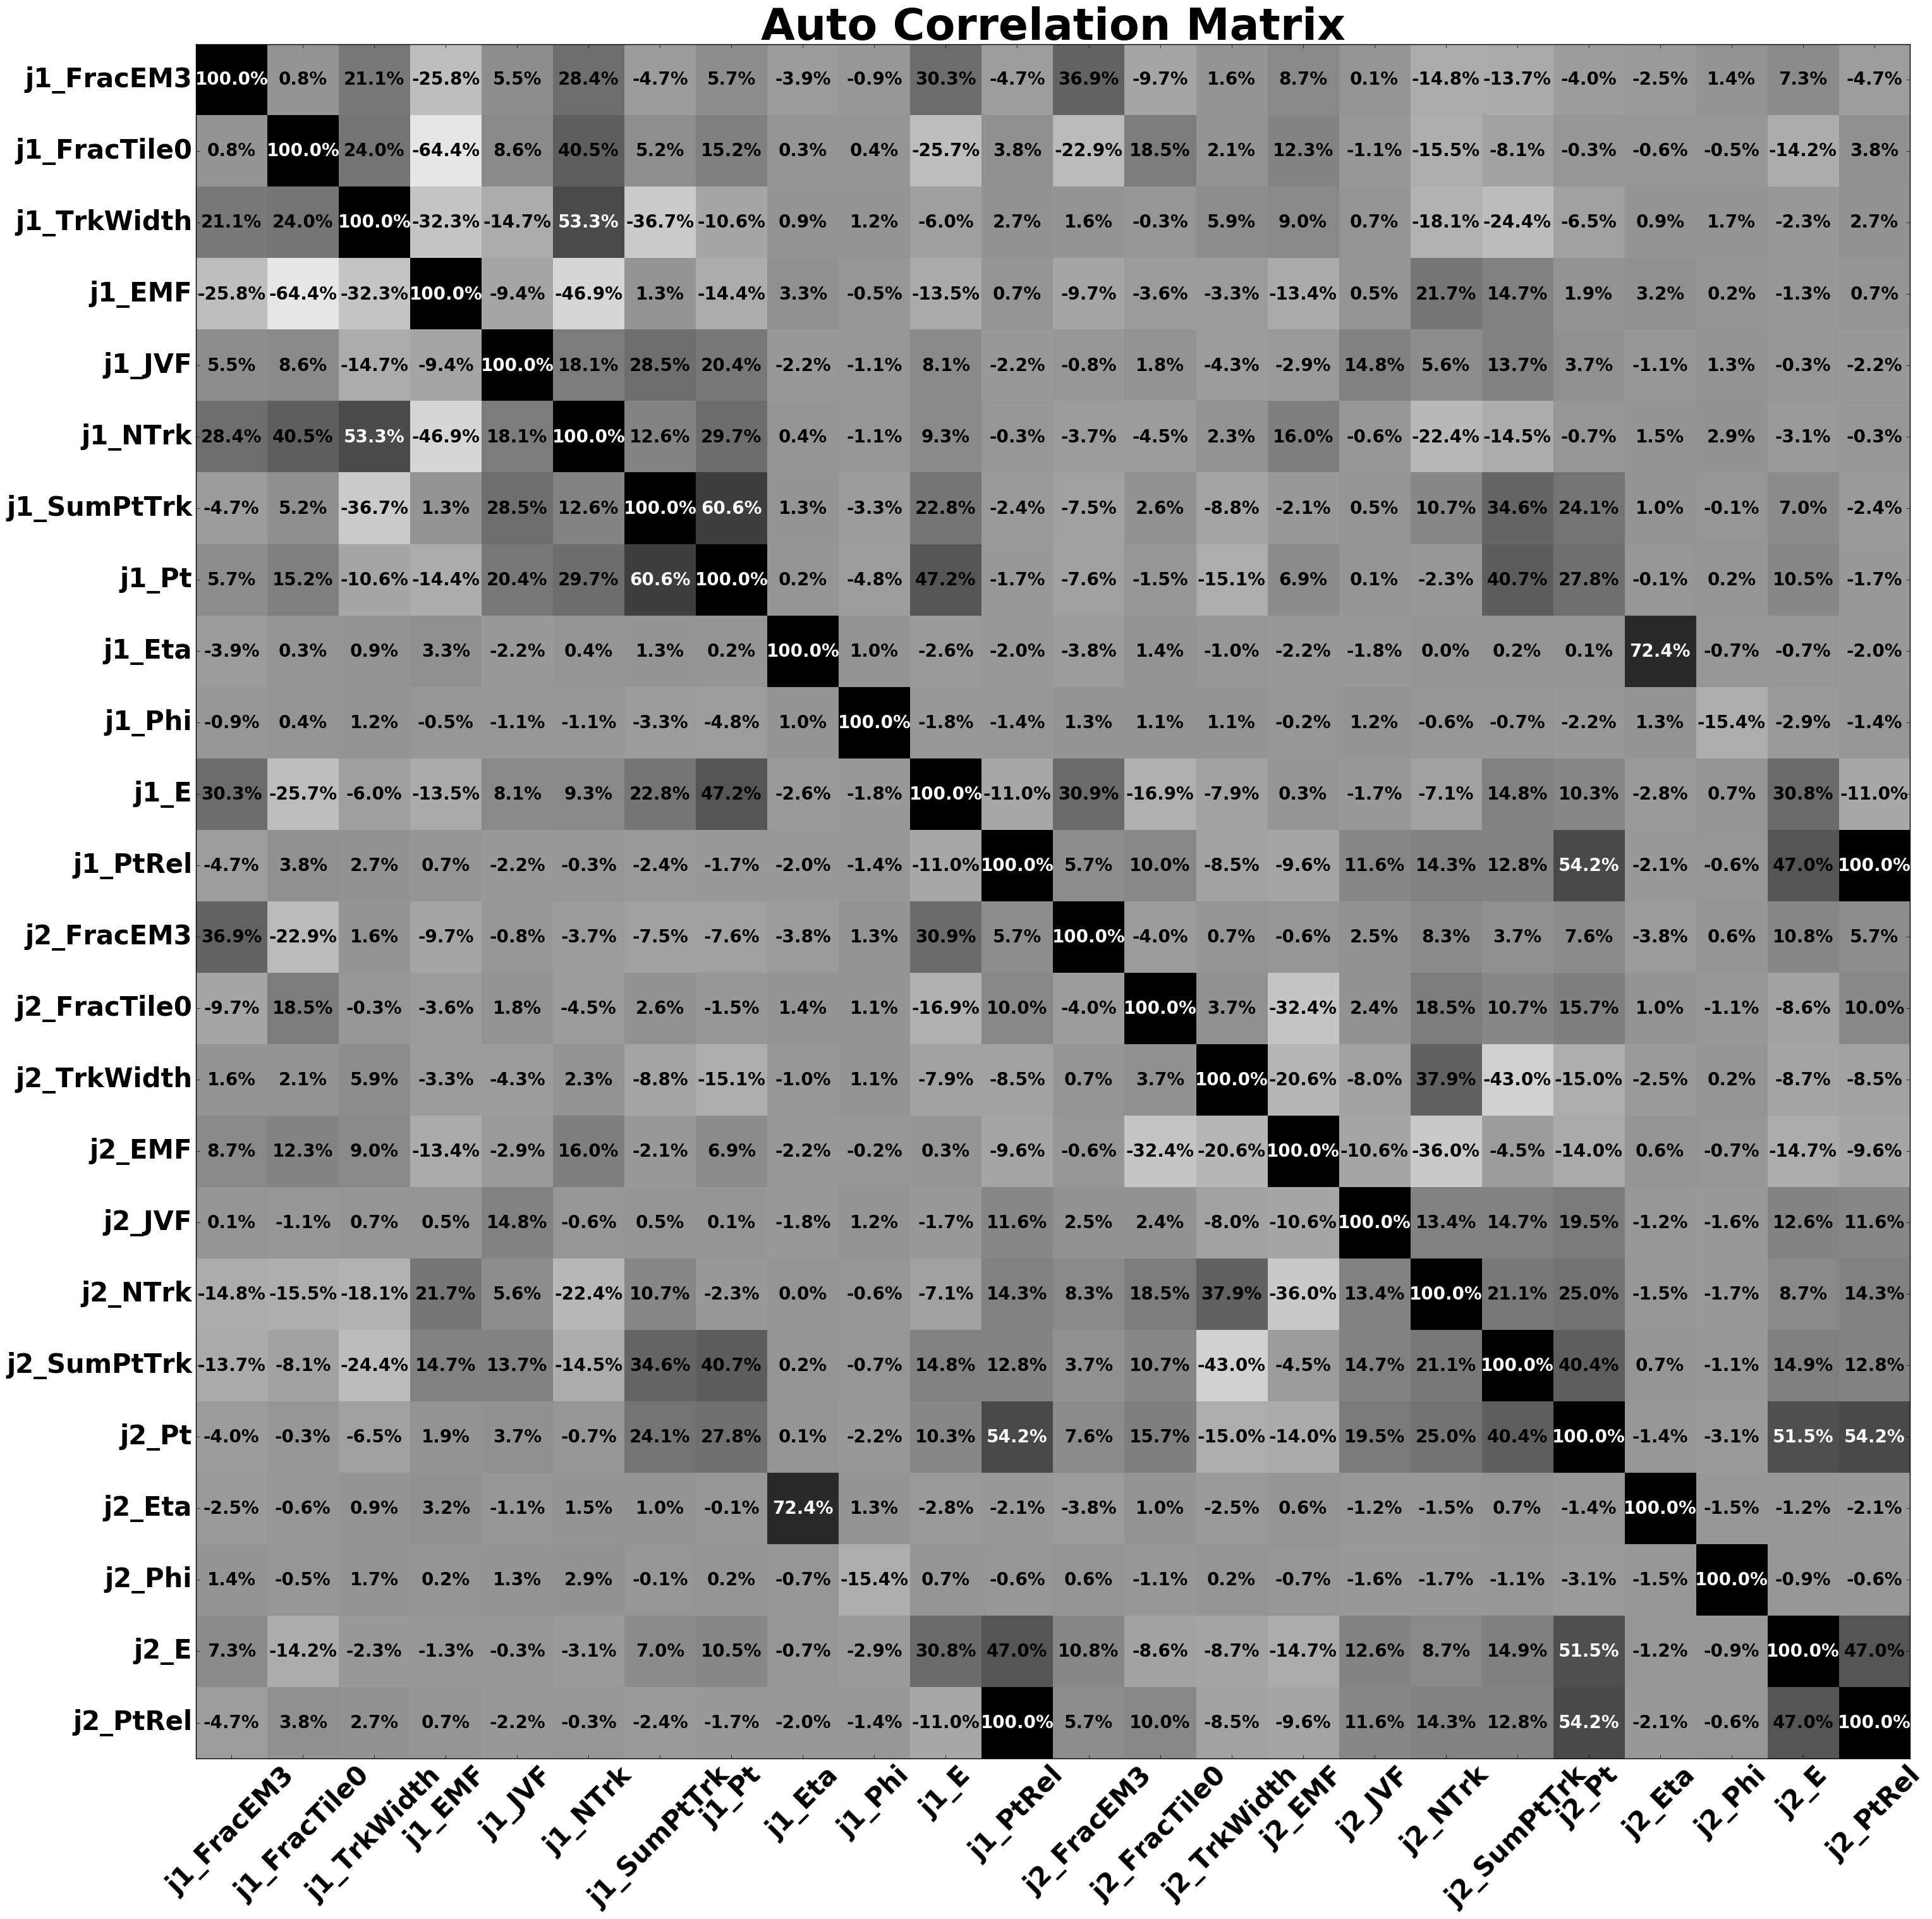

In [3]:
# Make a correlation matrix between all variables.

import matplotlib.pyplot as plt
%matplotlib inline 

plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30

plt.rc('legend', **{'fontsize':15})

plt.rc('font', weight='bold', size=20)

AutCor = 100.0*np.corrcoef(signal, rowvar=0)

fig = plt.figure(figsize=(35,35))
ax = fig.add_subplot(111)
ax.set_aspect(1)
#cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]

AutoCor_Matrix = ax.imshow(AutCor,interpolation='nearest',cmap=plt.cm.Greys,clim=(-100.0, 100.0))

#fig.colorbar(AutoCor_Matrix)

width, height = AutCor.shape

for x in xrange(width):
    for y in xrange(height):
        if AutCor[x][y] < 50.:
            ax.annotate("%1.1f%%"%(AutCor[x][y]), xy=(y, x), horizontalalignment="center",verticalalignment="center")
        else:
            ax.annotate("%1.1f%%"%(AutCor[x][y]), xy=(y, x), horizontalalignment="center",verticalalignment="center",color="white")

ax.set_yticks(np.arange(AutCor.shape[1]))
ax.set_xticks(np.arange(AutCor.shape[0]))

labels = ['j1_FracEM3', 'j1_FracTile0', 'j1_TrkWidth', 'j1_EMF', 'j1_JVF', 'j1_NTrk', 'j1_SumPtTrk', 'j1_Pt', 'j1_Eta', 'j1_Phi', 'j1_E', 'j1_PtRel', 'j2_FracEM3', 'j2_FracTile0', 'j2_TrkWidth', 'j2_EMF', 'j2_JVF', 'j2_NTrk', 'j2_SumPtTrk', 'j2_Pt', 'j2_Eta', 'j2_Phi', 'j2_E', 'j2_PtRel']

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.xticks(rotation=45)

ax.set_title('Auto Correlation Matrix', fontweight='bold', fontsize=50)


#plt.savefig(path_tosave+'/'+'AutCorMatrixBig.pdf')

<function matplotlib.pyplot.show>

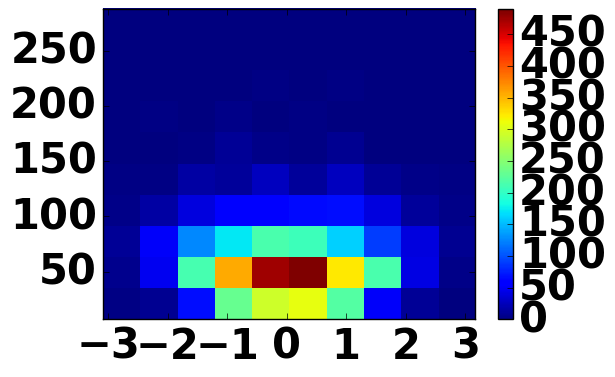

In [13]:
plt.hist2d(signal[:,8]-signal[:,20],signal[:,23])
plt.hist2d(TTbar[:,8]-TTbar[:,20],TTbar[:,23])
plt.colorbar()
plt.show

<function matplotlib.pyplot.show>

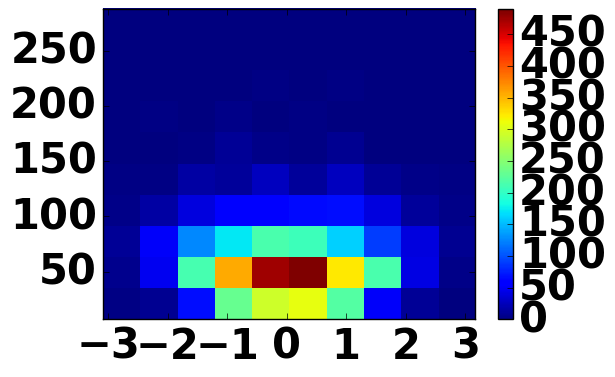

In [12]:
plt.hist2d(TTbar[:,8]-TTbar[:,20],TTbar[:,23])
plt.colorbar()
plt.show

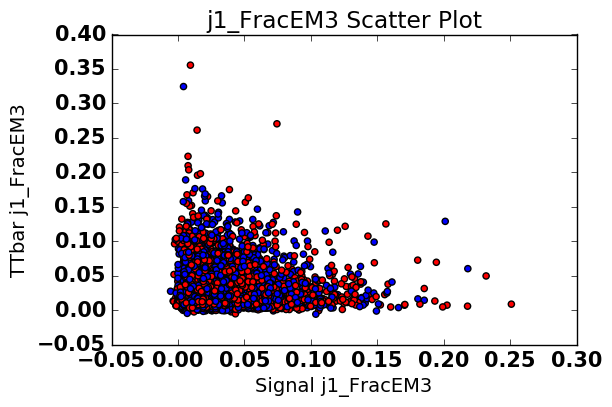

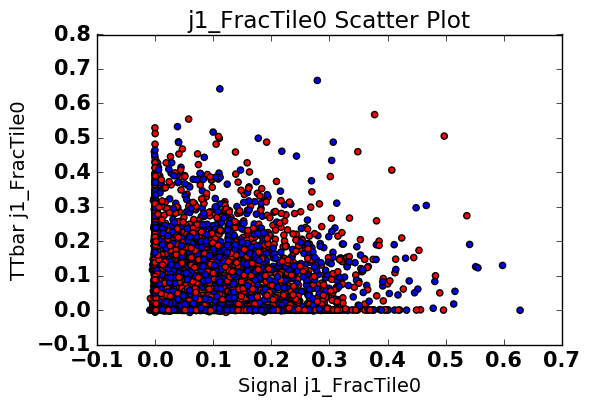

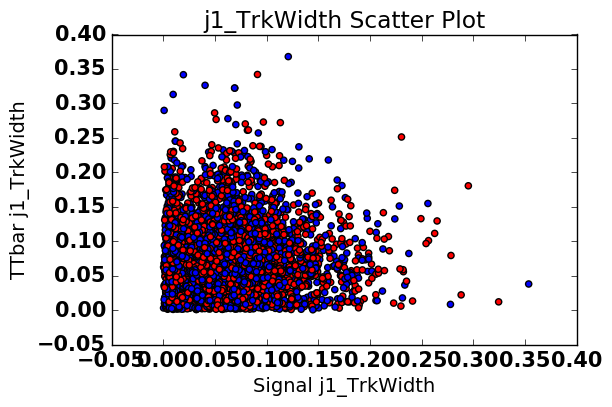

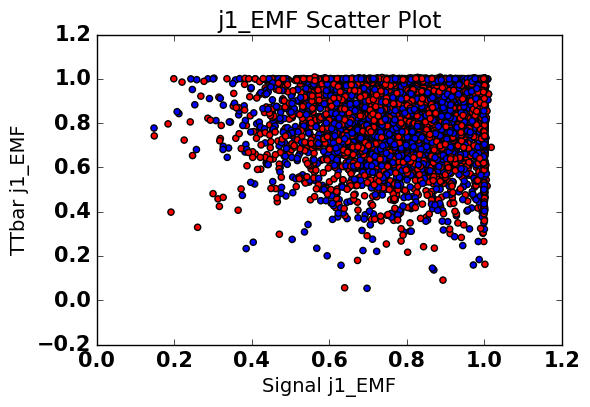

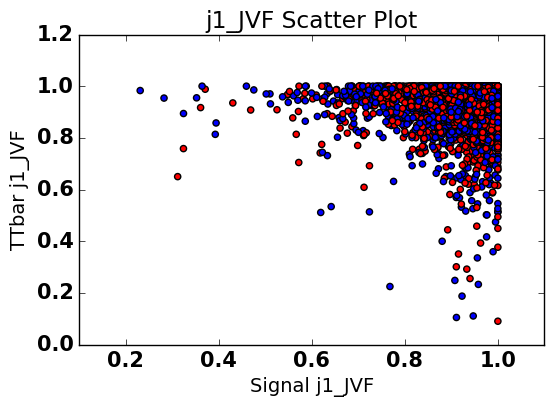

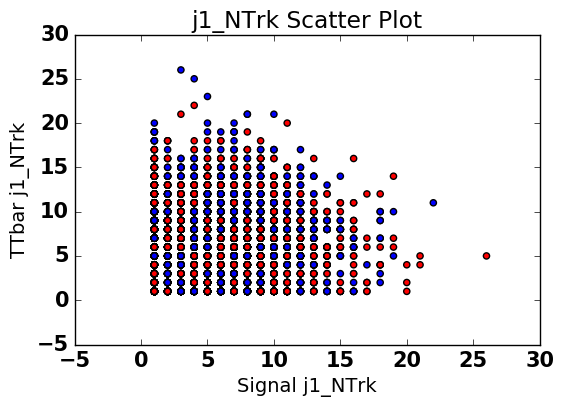

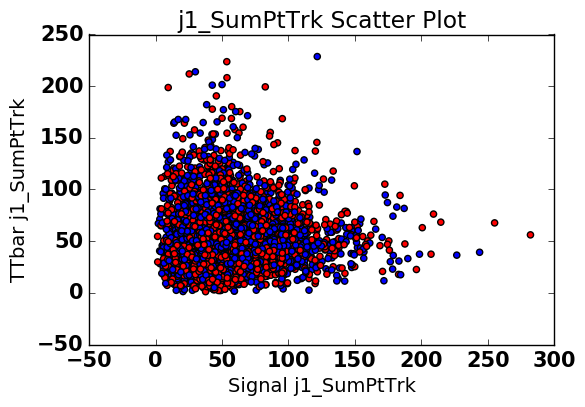

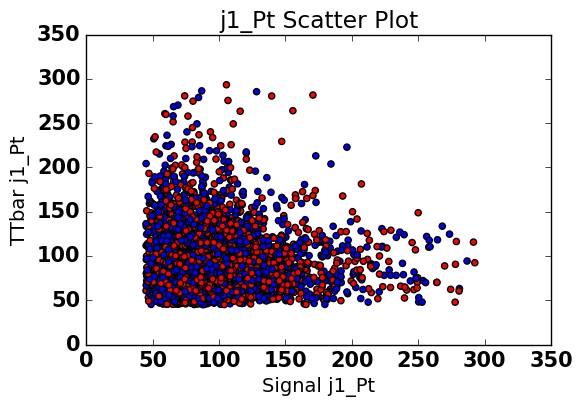

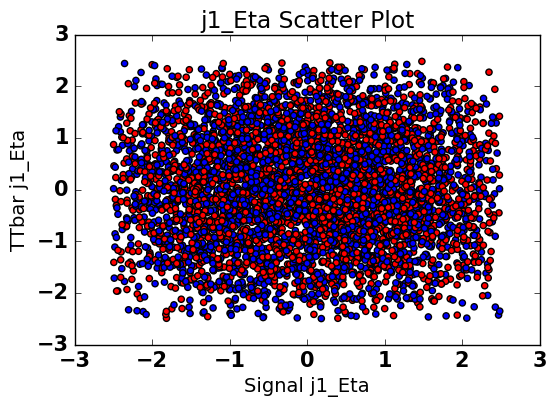

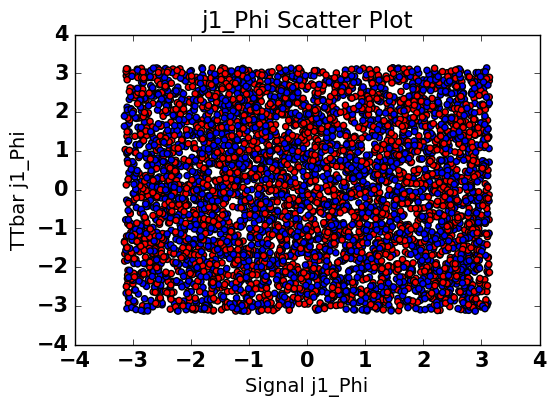

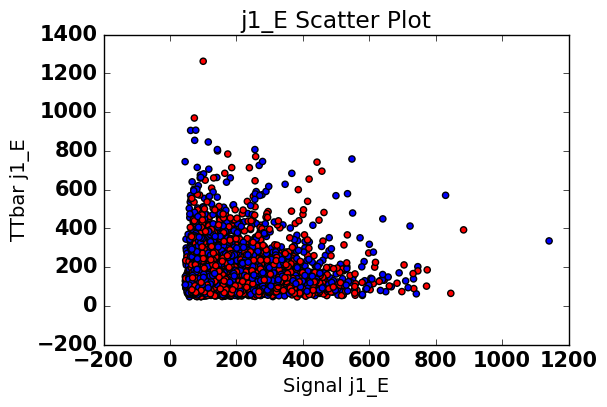

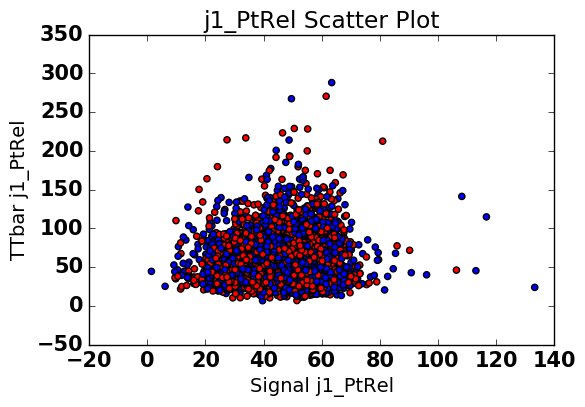

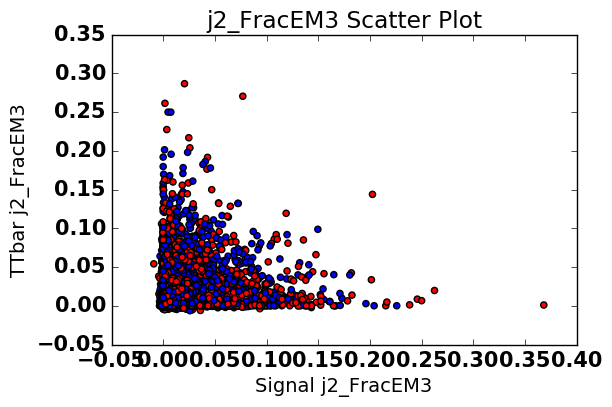

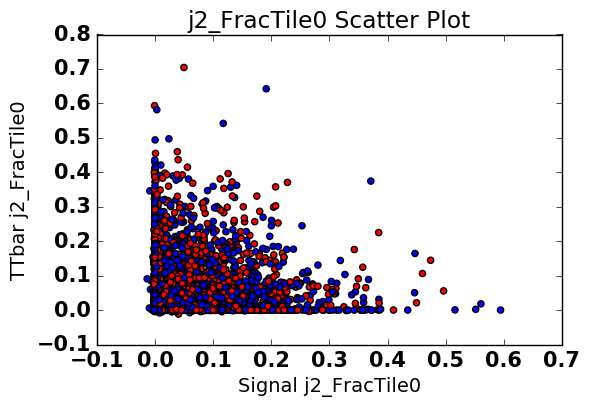

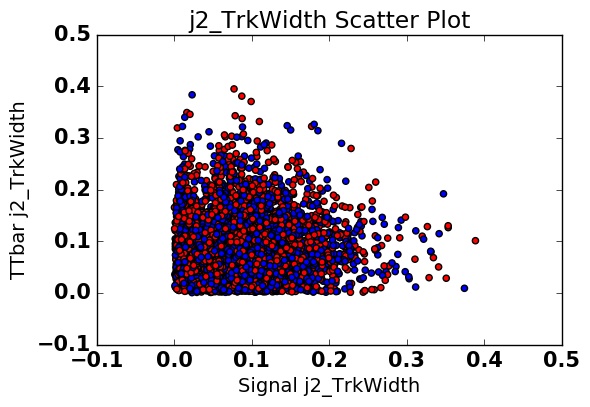

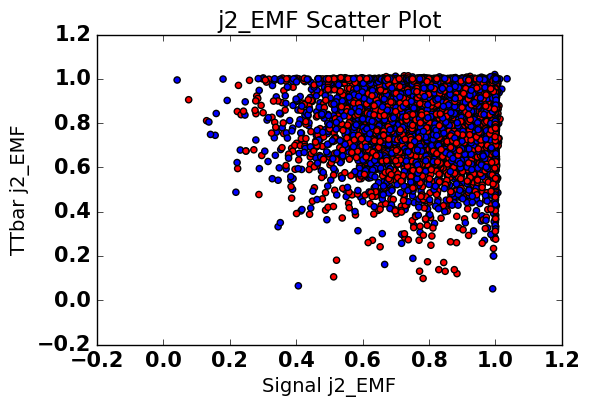

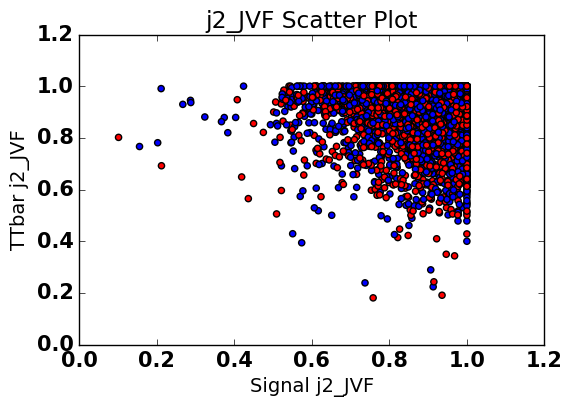

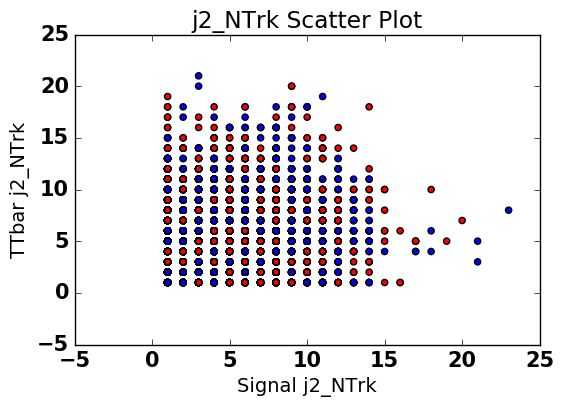

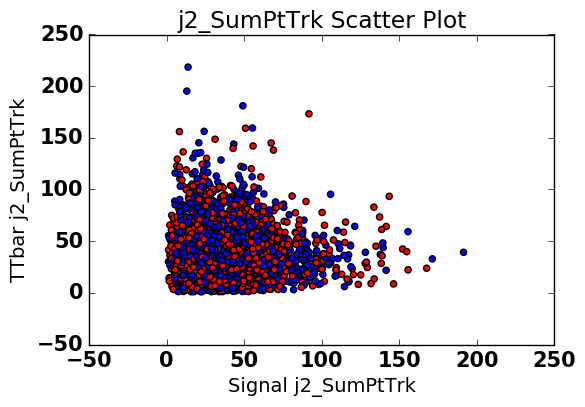

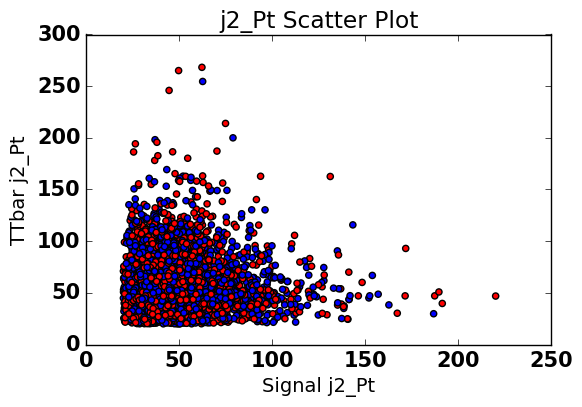

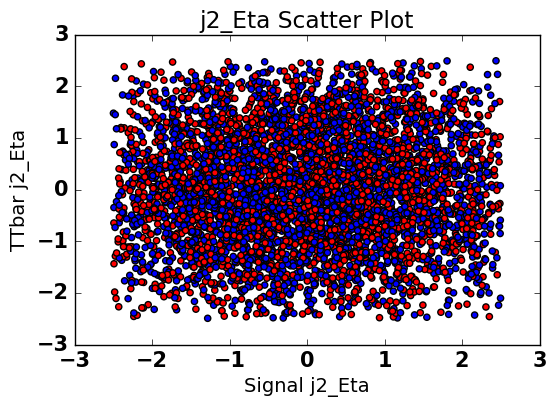

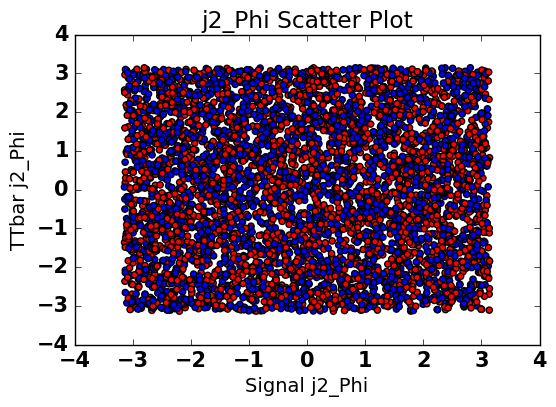

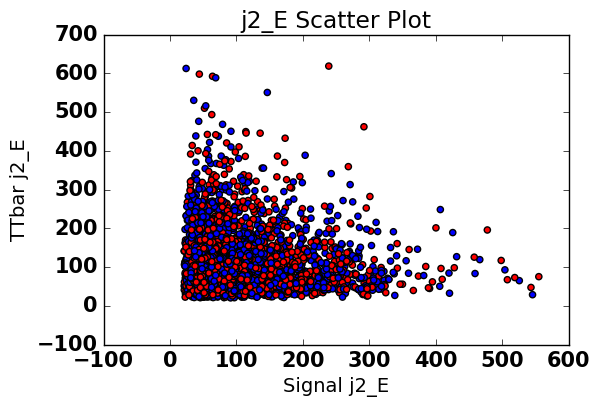

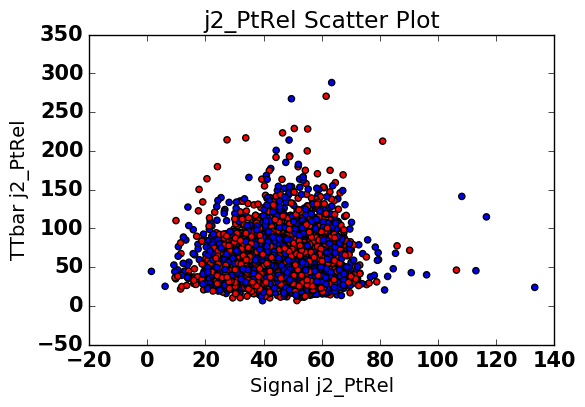

In [25]:
# correlations plots between signal and background
import matplotlib.pyplot as plt

variables = "j1_FracEM3,j1_FracTile0,j1_TrkWidth,j1_EMF,j1_JVF,j1_NTrk,j1_SumPtTrk,j1_Pt,j1_Eta,j1_Phi,j1_E,j1_PtRel,j2_FracEM3,j2_FracTile0,j2_TrkWidth,j2_EMF,j2_JVF,j2_NTrk,j2_SumPtTrk,j2_Pt,j2_Eta,j2_Phi,j2_E,j2_PtRel"

for variable,i in zip(variables.split(','),range(len(signal[0]))):
        
    plt.scatter(signal[:,i],TTbar[:,i], c=['b','r'], marker='o')
    plt.title(variable+' Scatter Plot')
    plt.xlabel('Signal '+variable)
    plt.ylabel('TTbar '+variable)
    #plt.savefig(save_plots+'/'+'normalized_distribution_'+variable+'.pdf')
    plt.show()

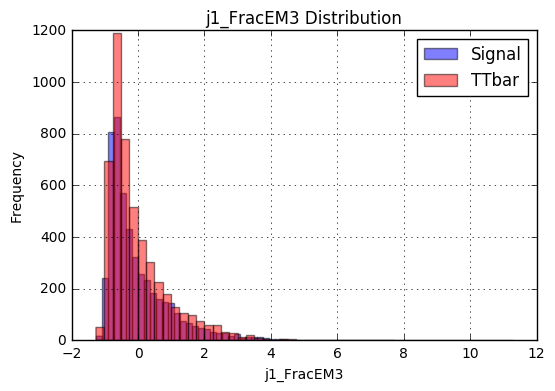

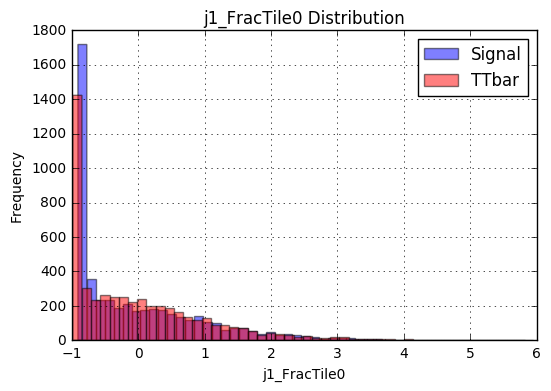

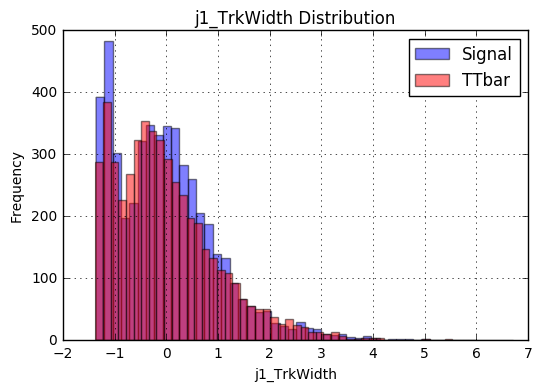

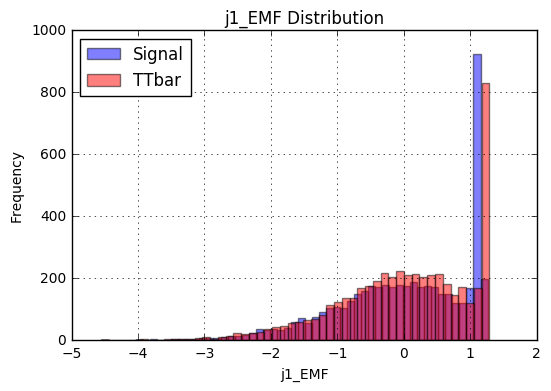

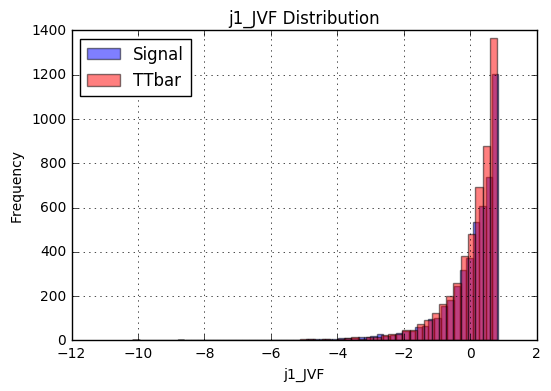

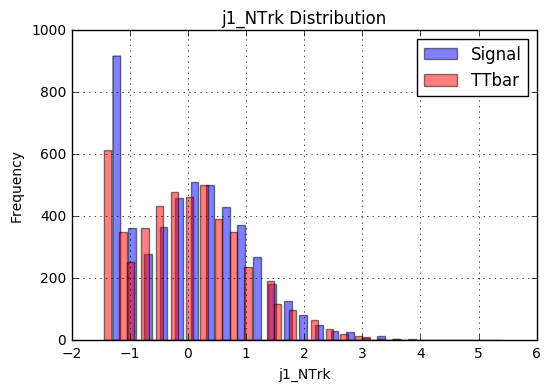

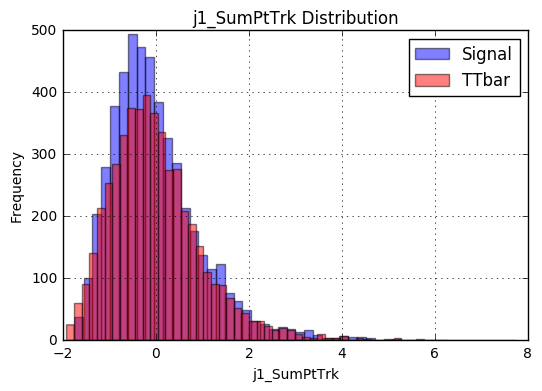

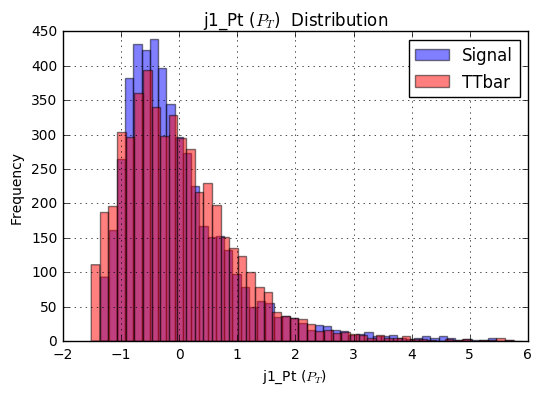

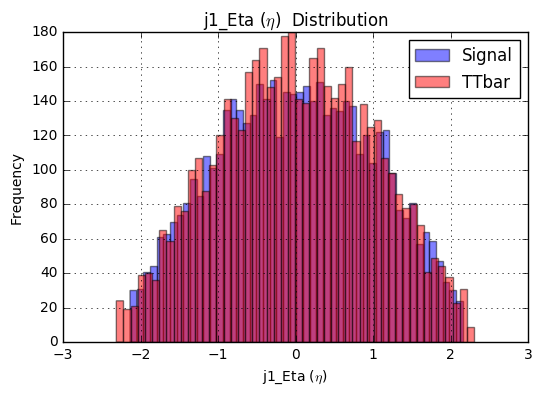

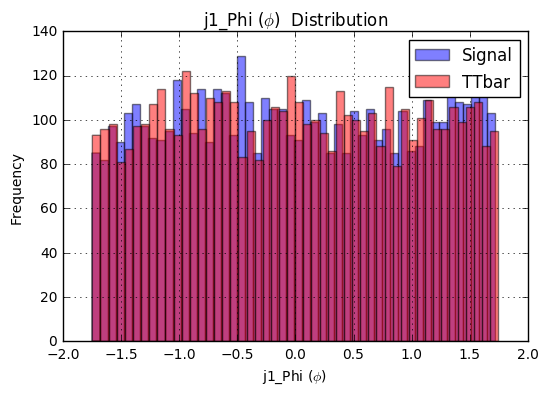

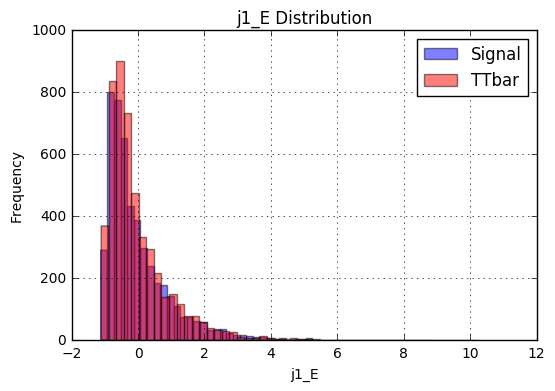

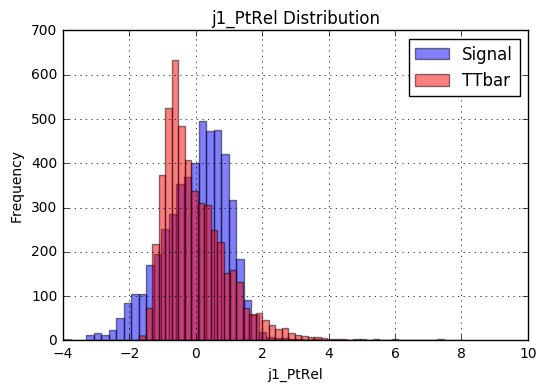

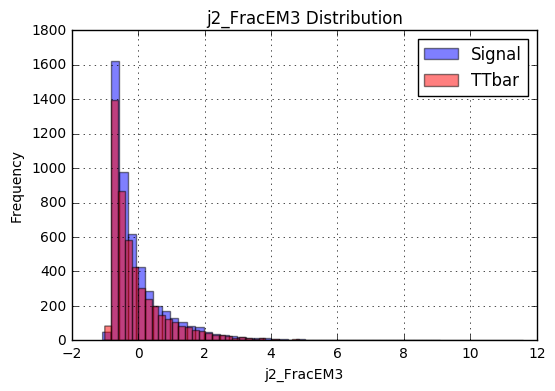

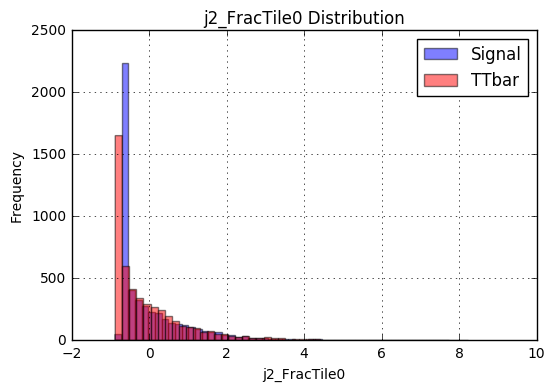

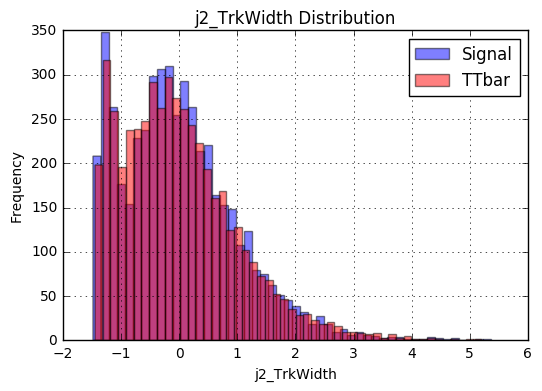

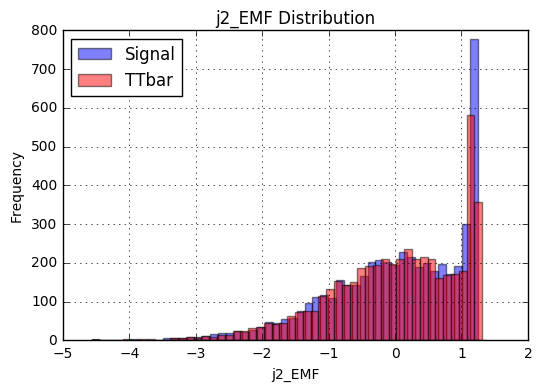

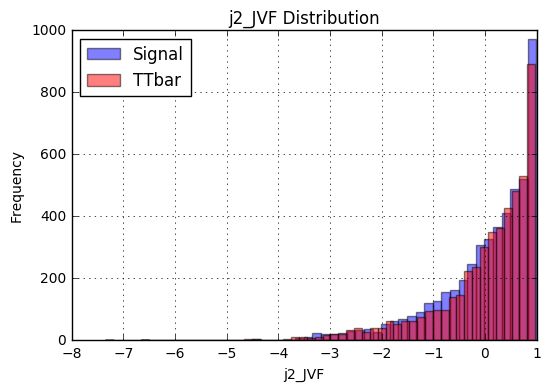

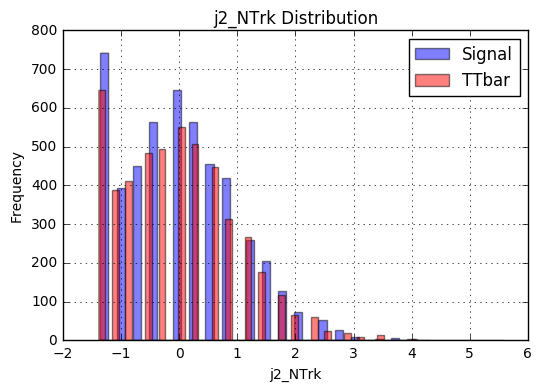

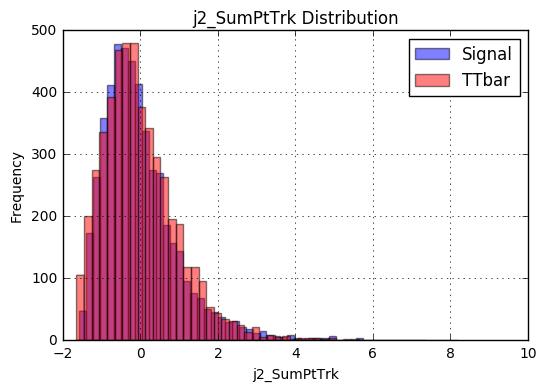

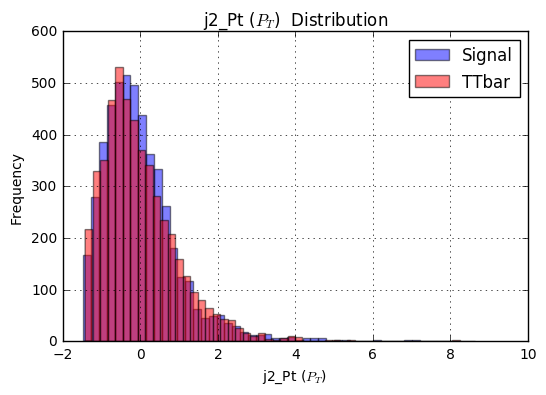

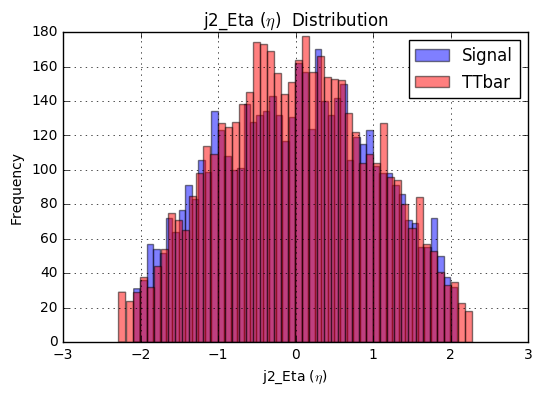

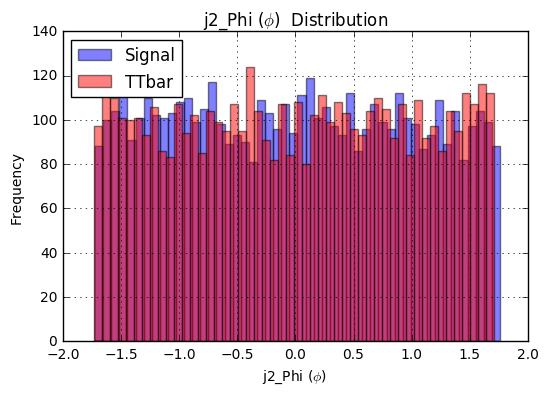

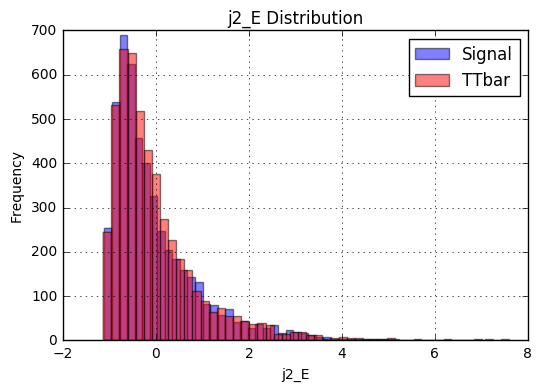

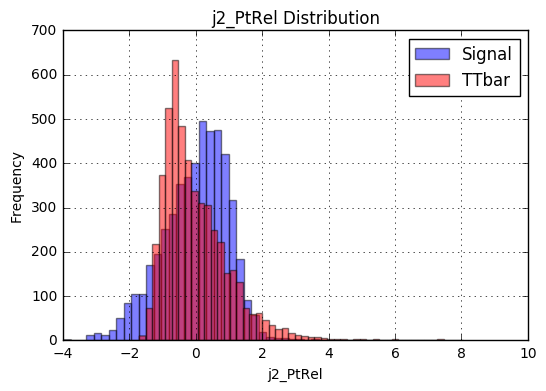

In [9]:
import matplotlib.pyplot as plt

save_plots = '/home/micael/MyWorkspace/DATA/Plots'

variables = r"j1_FracEM3,j1_FracTile0,j1_TrkWidth,j1_EMF,j1_JVF,j1_NTrk,j1_SumPtTrk,j1_Pt ($P_T$) ,j1_Eta ($\eta$) ,j1_Phi ($\phi$) ,j1_E,j1_PtRel,j2_FracEM3,j2_FracTile0,j2_TrkWidth,j2_EMF,j2_JVF,j2_NTrk,j2_SumPtTrk,j2_Pt ($P_T$) ,j2_Eta ($\eta$) ,j2_Phi ($\phi$) ,j2_E,j2_PtRel"

for variable,i in zip(variables.split(','),range(len(signal[0]))):
        
    plt.hist(signal_scaled[:,i],50,color='b',alpha=0.5,label='Signal')
    plt.hist(TTbar_scaled[:,i],50,color='r',alpha=0.5,label='TTbar')
    plt.title(variable+' Distribution')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.legend(loc='best')
    plt.grid()
    plt.savefig(save_plots+'/'+'Normalized_distribution_'+variable+'.pdf')
    plt.show()

In [1]:
# using synthetic data
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=10000, centers=7, n_features=5,
                  random_state=None)



In [2]:
from sklearn.svm import SVC
from sklearn import cross_validation

n_folds = 2
n_inits = 2

CVO = cross_validation.StratifiedKFold(y,n_folds)
CVO = list(CVO)

clf = SVC()


for ifold in range(n_folds):
    train_id, test_id = CVO[ifold]
    
    clf.fit(X[train_id],y[train_id])
    score = clf.score(X[test_id],y[test_id])
    predi = clf.predict(X[test_id])
    print ('Processing: Fold %i of %i Score %1.3f '%(
                ifold+1, n_folds, 
                score))
    print 'Predict test set =', predi
    print 'true label = ', y[test_id]
    
    print '=================================================='
#clf.fit(X,y)

Processing: Fold 1 of 2 Score 1.000 
Predict test set = [5 4 2 ..., 5 3 3]
true label =  [5 4 2 ..., 5 3 3]
Processing: Fold 2 of 2 Score 1.000 
Predict test set = [1 1 1 ..., 6 1 0]
true label =  [1 1 1 ..., 6 1 0]


In [7]:
# training with supervised method 

from sklearn.svm import SVC
from sklearn import cross_validation
from sklearn.metrics import accuracy_score

n_folds = 10

CVO = cross_validation.StratifiedKFold(trgt,n_folds)
CVO = list(CVO)

g = 0.1
clas = SVC(gamma=g,tol=1e-3)


for ifold in range(n_folds):
    train_id, test_id = CVO[ifold]
    
    clas.fit(all_data_scaled[train_id],trgt[train_id])
    score = clas.score(all_data_scaled[test_id],trgt[test_id])
    predi = clas.predict(all_data_scaled[test_id])
    
    acc_score = accuracy_score(trgt[test_id],predi)
    print ('Processing: Fold %i of %i Score %1.3f '%(
                ifold+1, n_folds, 
                score))
    #print 'Predict test set =', predi
    #print 'true label = ', trgt[test_id]
    print 'accuracy score', acc_score
    print '=================================================='



Processing: Fold 1 of 10 Score 0.684 
accuracy score 0.684
Processing: Fold 2 of 10 Score 0.678 
accuracy score 0.678
Processing: Fold 3 of 10 Score 0.722 
accuracy score 0.722
Processing: Fold 4 of 10 Score 0.690 
accuracy score 0.69
Processing: Fold 5 of 10 Score 0.695 
accuracy score 0.695
Processing: Fold 6 of 10 Score 0.706 
accuracy score 0.706
Processing: Fold 7 of 10 Score 0.706 
accuracy score 0.706
Processing: Fold 8 of 10 Score 0.677 
accuracy score 0.677
Processing: Fold 9 of 10 Score 0.679 
accuracy score 0.679
Processing: Fold 10 of 10 Score 0.690 
accuracy score 0.69


In [8]:
predi_all = clas.predict(all_data_scaled)
predi_signal = clas.predict(signal_scaled)

class1_signal = signal_scaled[predi_signal==0,:]
class2_signal = signal_scaled[predi_signal==1,:]

predi_TTbar = clas.predict(TTbar_scaled)

class1_ttbar = TTbar_scaled[predi_TTbar==0,:]
class2_ttbar = TTbar_scaled[predi_TTbar==1,:]

print 'classe 1 para sinal', class1_signal.shape
print 'classe 2 para sinal', class2_signal.shape
print '=========================================='
print 'classe 1 para ttbar', class1_ttbar.shape
print 'classe 2 para ttbar', class2_ttbar.shape


classe 1 para sinal (1330, 24)
classe 2 para sinal (3670, 24)
classe 1 para ttbar (3644, 24)
classe 2 para ttbar (1356, 24)


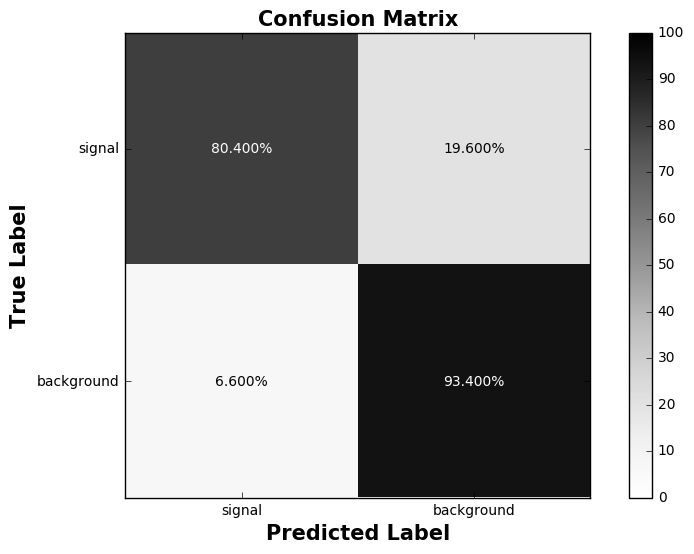

In [12]:
# confusion matrix for supervised clustering training (SVC)

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

data_labels = ['signal','background']
output_class = predi_all
choose_fold = 3

train_id, test_id = CVO[choose_fold]

cm = confusion_matrix(trgt[test_id], output_class[test_id], labels=[0,1])
cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
cm_normalized = 100.*cm

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_aspect(1)

im = ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Greys,clim=(0.0, 100.0))

width, height = cm_normalized.shape


for x in xrange(width):
    for y in xrange(height):
        if cm_normalized[x][y] < 50.:
            ax.annotate('%1.3f%%'%(cm_normalized[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center')
        else:
            ax.annotate('%1.3f%%'%(cm_normalized[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center',color='white')

ax.set_title('Confusion Matrix',fontweight='bold',fontsize=15)
fig.colorbar(im)

tick_marks = np.arange(len(data_labels))
ax.xaxis.set_ticks(tick_marks)
ax.xaxis.set_ticklabels(data_labels)

ax.yaxis.set_ticks(tick_marks)
ax.yaxis.set_ticklabels(data_labels)

ax.set_ylabel('True Label',fontweight='bold',fontsize=15)
ax.set_xlabel('Predicted Label',fontweight='bold',fontsize=15)
fig.savefig(save_plots+'/'+'PtRel_confusionMatrixSVC_gamma='+str(g)+'_acc='+str('%f' % acc_score)+'.pdf')

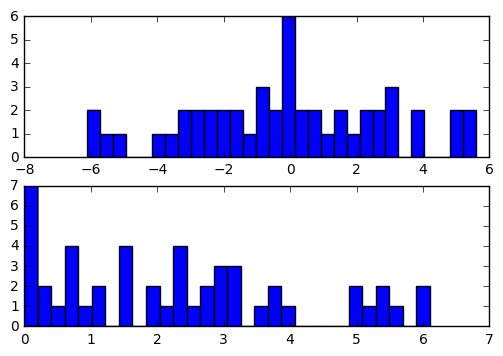

(49, 1)


In [56]:
#only for exercices estimate r_0 - Caloba Exercice
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.decomposition import PCA

X = np.array([[-3.2],[-3.0],[-0.7],[0],[0.8],[2.0],[2.4],[2.9]])
X_scaled = preprocessing.scale(X)
for i in range(X.shape[0]-1):
    for j in range(X.shape[0]):
        dist0 = X[i,:]-X[j,:]
        dist1 = abs(X[i,:]-X[j,:])
        dataBuffer0 = np.array([dist0])
        dataBuffer1 = np.array([dist1])
        if i==0:
            data0 = dataBuffer0
            data1 = dataBuffer1
        else:
            data0 = np.append(data0,dataBuffer0, axis=0)
            data1 = np.append(data1,dataBuffer1, axis=0)


#print data
plt.subplot(211)
plt.hist(data0,bins=30)
plt.subplot(212)
plt.hist(data1,bins=30)
plt.show()
print data0.shape

In [57]:
np.std(data1)

0.49487165930539345